<a href="https://colab.research.google.com/github/ijashanpreetx/ijashanpreetx/blob/main/project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import necessary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### **Step 1: Reading & Understanding the Data**

In [ ]:

import os
for dirname, _, filenames in os.walk('/python/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
bike = pd.read_csv("day.csv", parse_dates=['dteday'])

In [ ]:

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:

bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [ ]:

bike.shape

(730, 16)

In [ ]:

bike.size

11680

In [ ]:

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<Axes: >

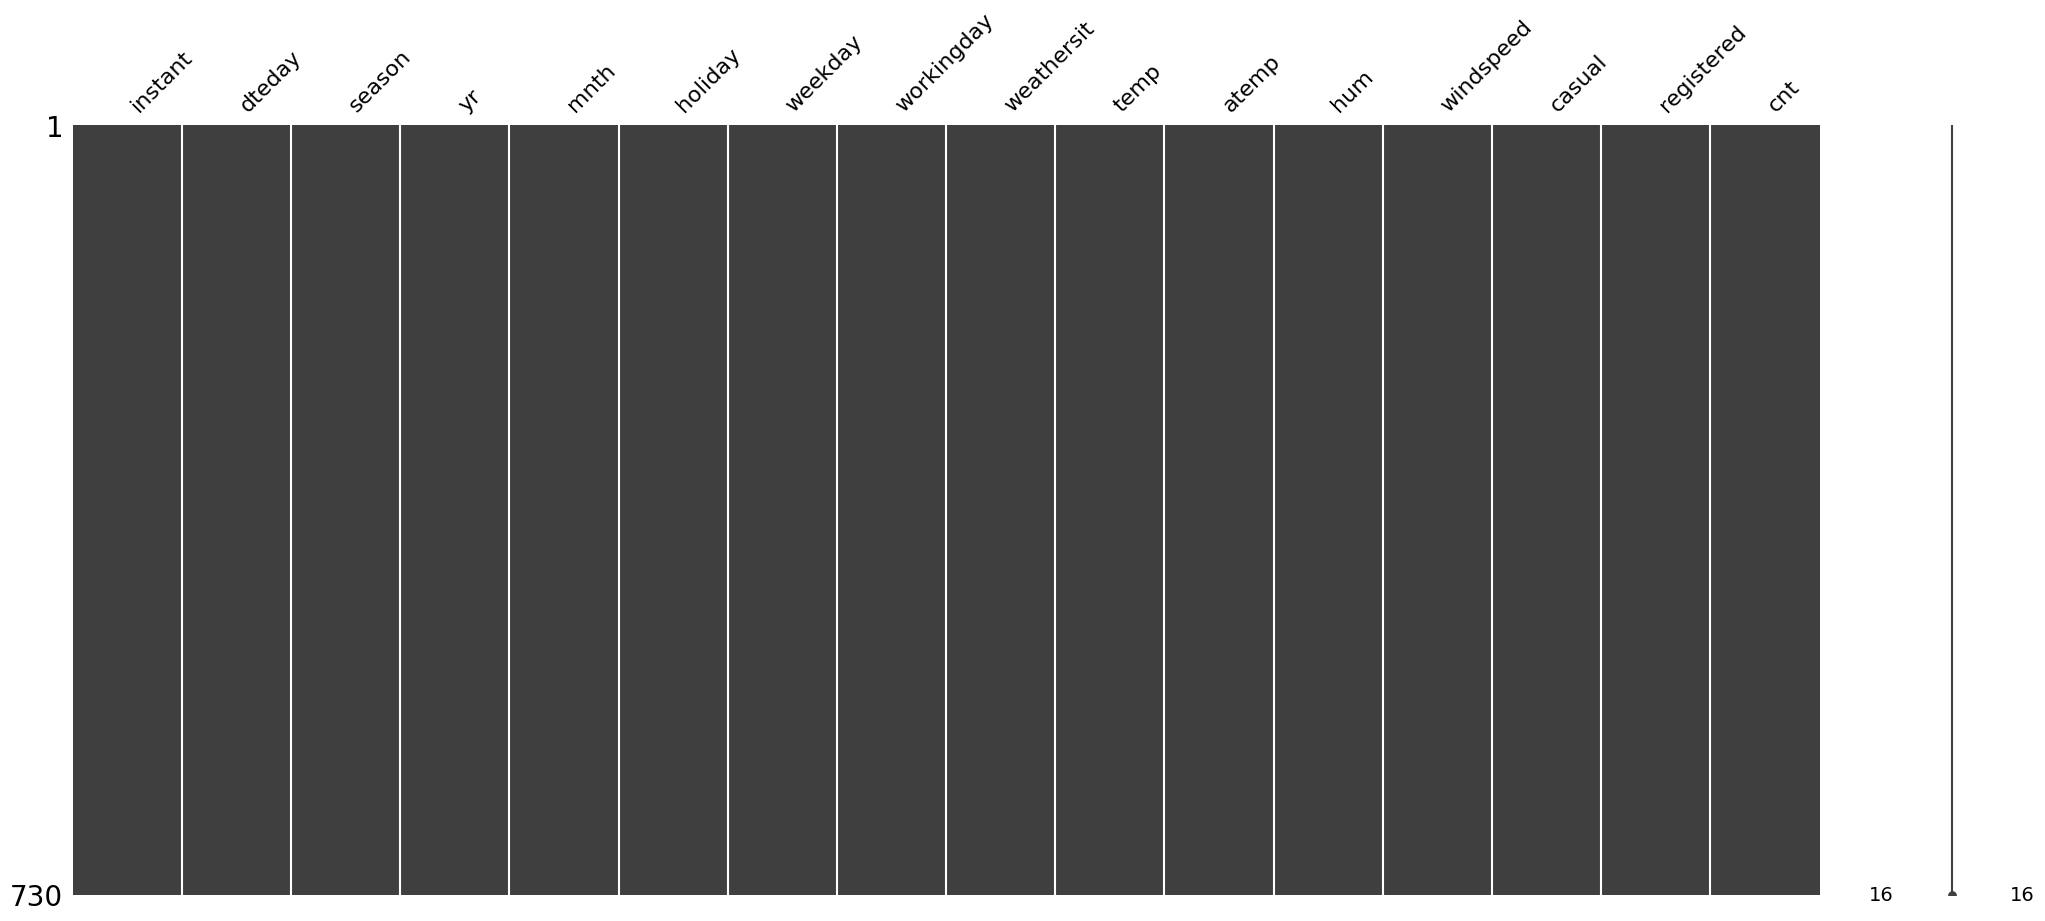

In [ ]:
# To check if there are any missing values in the dataset

import missingno as mn
mn.matrix(bike)

In [ ]:



# Creating a copy of original dataframe for duplicate check
bike_dup = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

<function matplotlib.pyplot.show(close=None, block=None)>

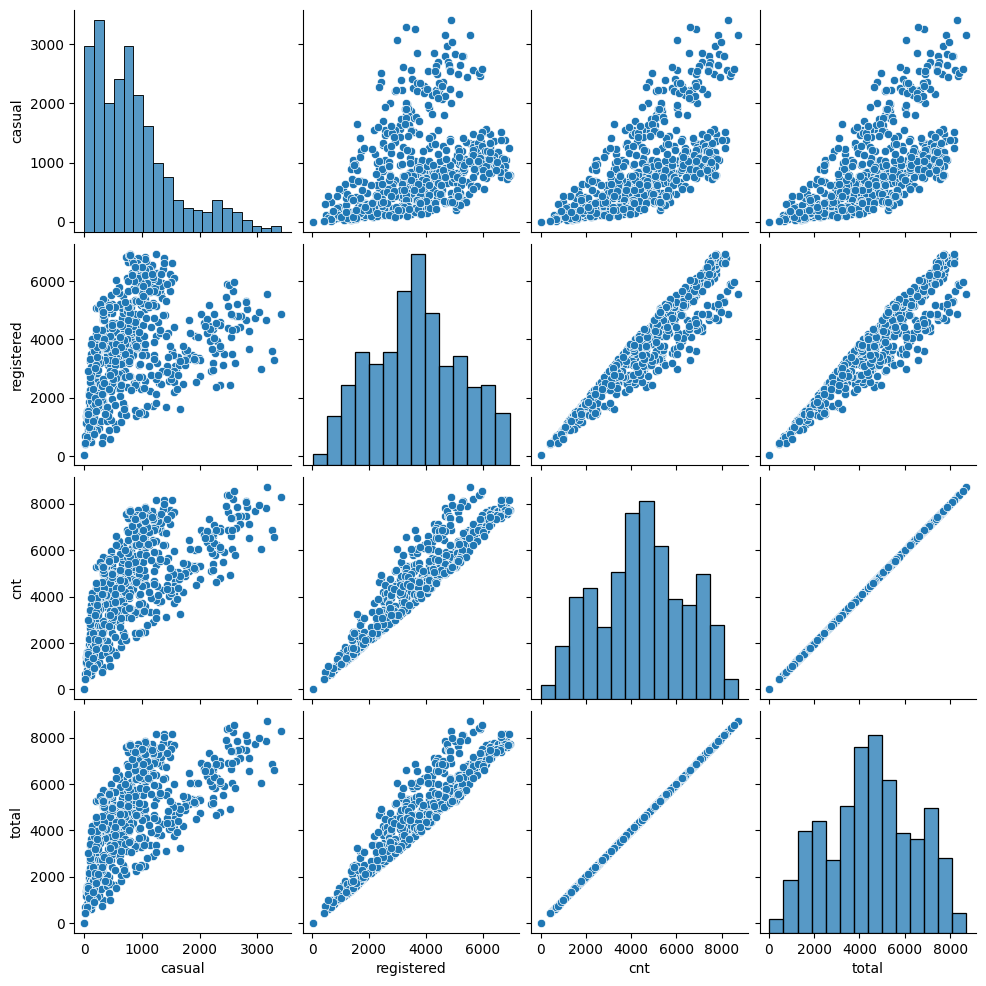

In [ ]:
# Checking the relationship between casual, registered and cnt column
bike_cnt = bike[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show

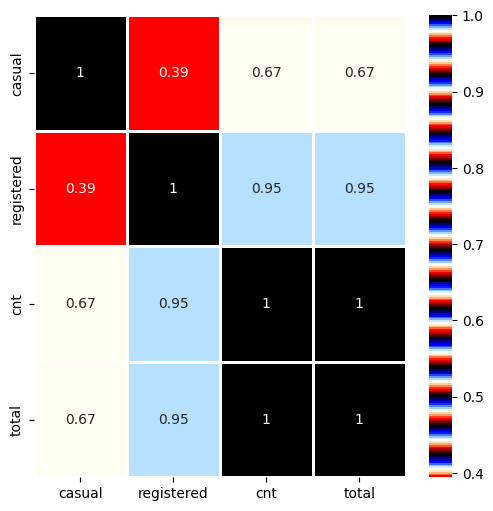

In [ ]:
# also checking the correlation of the variables
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="flag",linewidth =1)
plt.show()

In [ ]:
#dropping the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 12)

### **Step 2: Encoding & Visualizing the data**

In [ ]:


#Converting season
bike.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
bike.season.value_counts(normalize=True)

season
W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: proportion, dtype: float64

In [ ]:


#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)

mnth
Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: proportion, dtype: float64

In [ ]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

weathersit
Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: proportion, dtype: float64

In [ ]:

#Converting weathersit
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

weekday
Monday       0.143836
Tuesday      0.143836
Wednesday    0.142466
Thursday     0.142466
Friday       0.142466
Saturday     0.142466
Sunday       0.142466
Name: proportion, dtype: float64

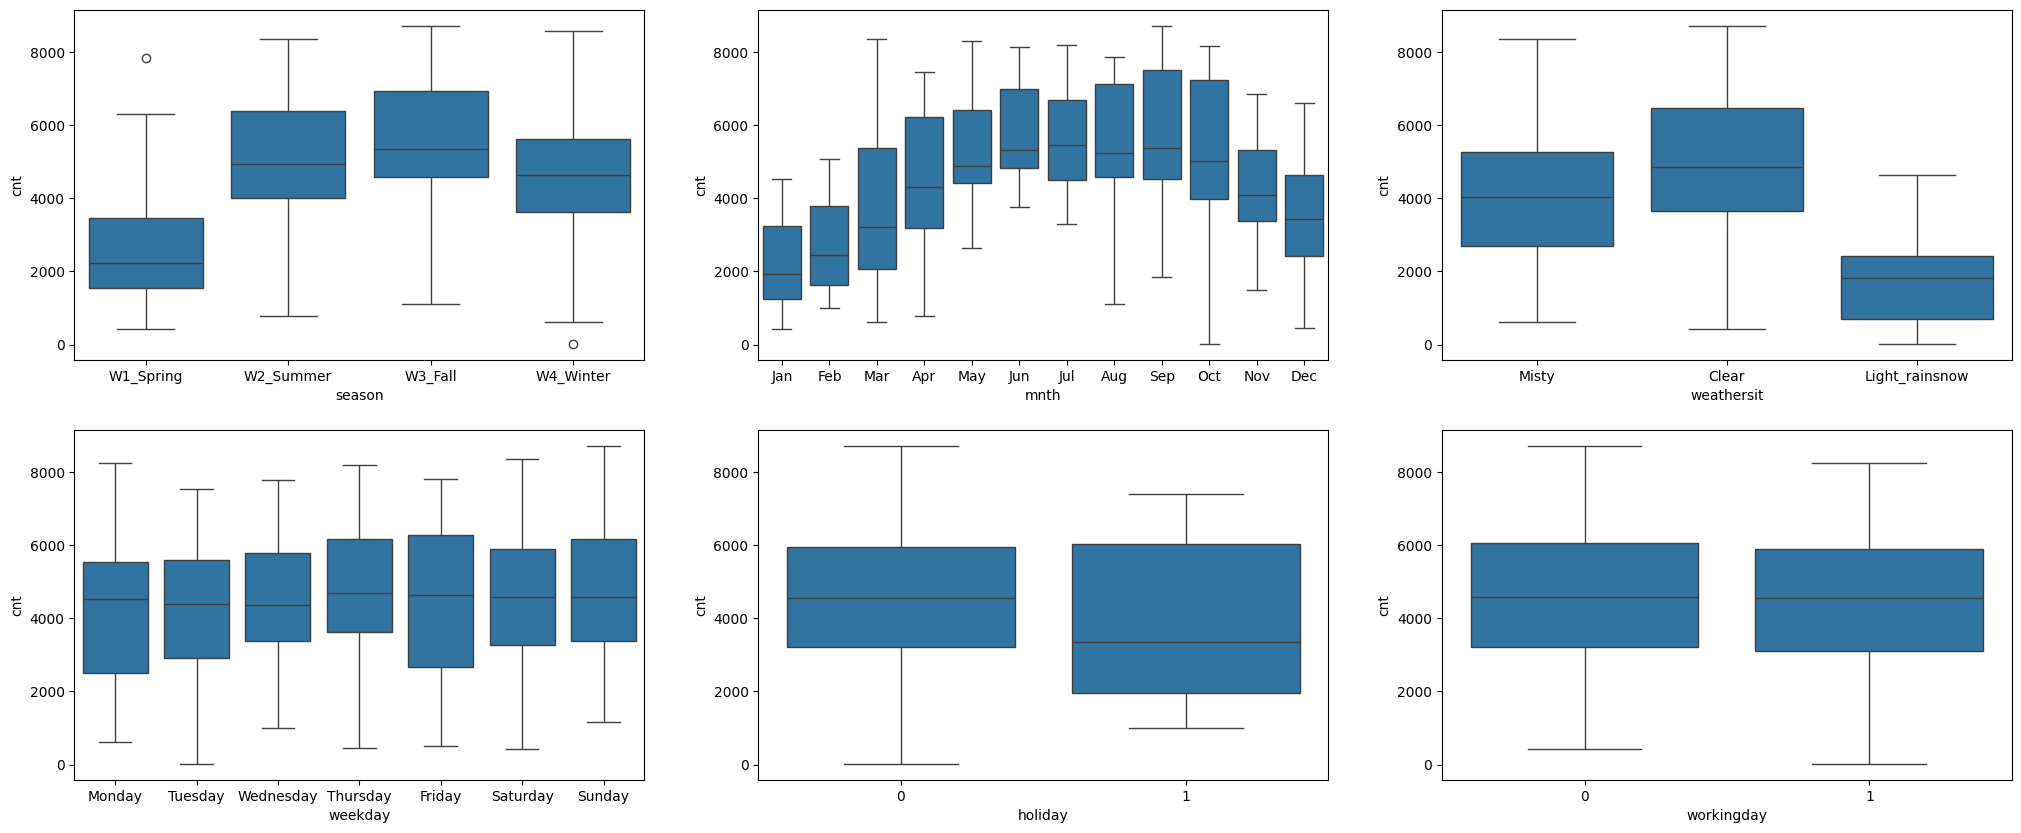

In [ ]:


# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt'
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [ ]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
    return round(cat_df,2)

In [ ]:

# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

In [ ]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
W3_Fall,1061129,5644.30,188,32.24,25.75
W2_Summer,918589,4992.33,184,27.91,25.21
W4_Winter,841613,4728.16,178,25.57,24.38
W1_Spring,469514,2608.41,180,14.27,24.66


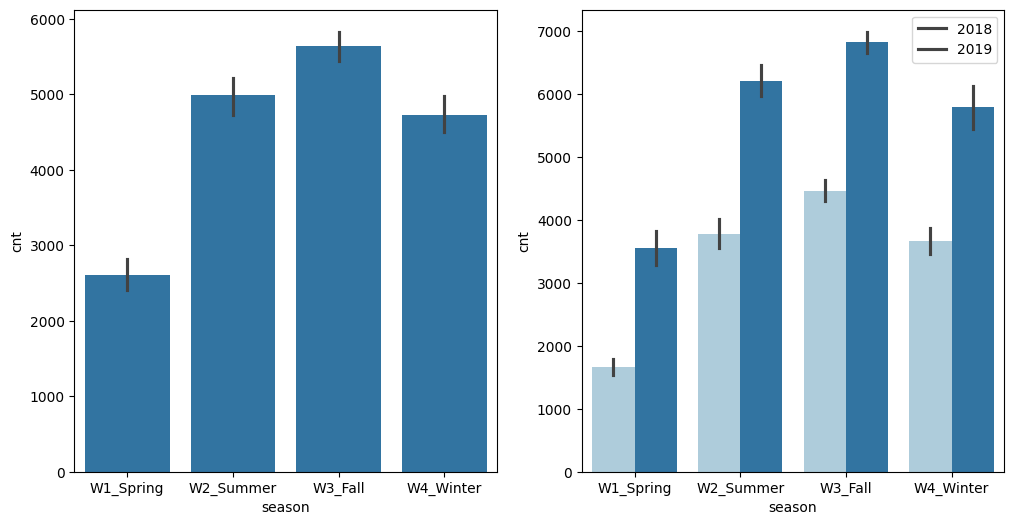

In [ ]:


import seaborn as sns # Make sure you import seaborn

# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(x=col, y='cnt',data=bike) # Specify x and y
    plt.subplot(1,2,2)
    sns.barplot(x=col, y='cnt',data=bike, hue='yr',palette='Paired') # Specify x and y
    plt.legend(labels=['2018', '2019'])
    return

categorical_plot('season',12,6)

In [ ]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


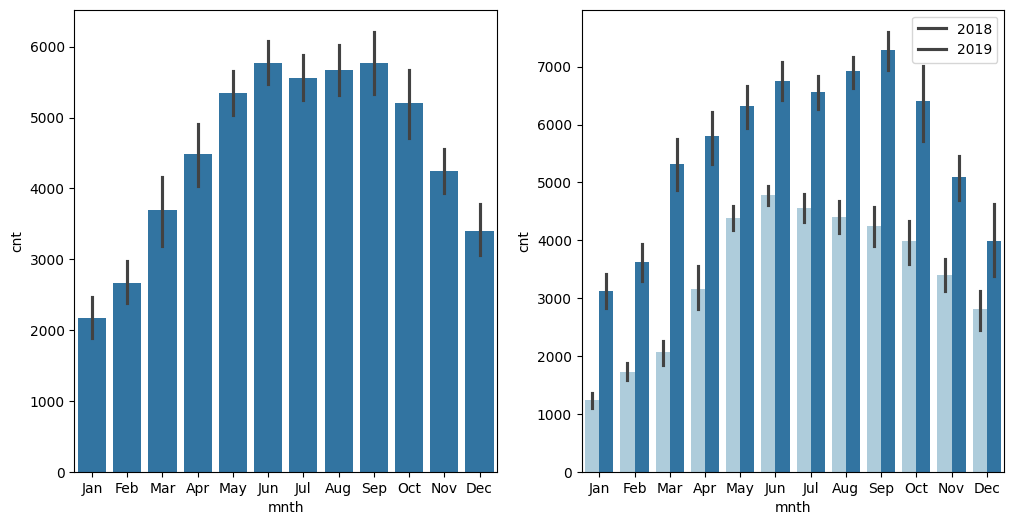

In [ ]:
categorical_plot('mnth',12,6)

In [ ]:


categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


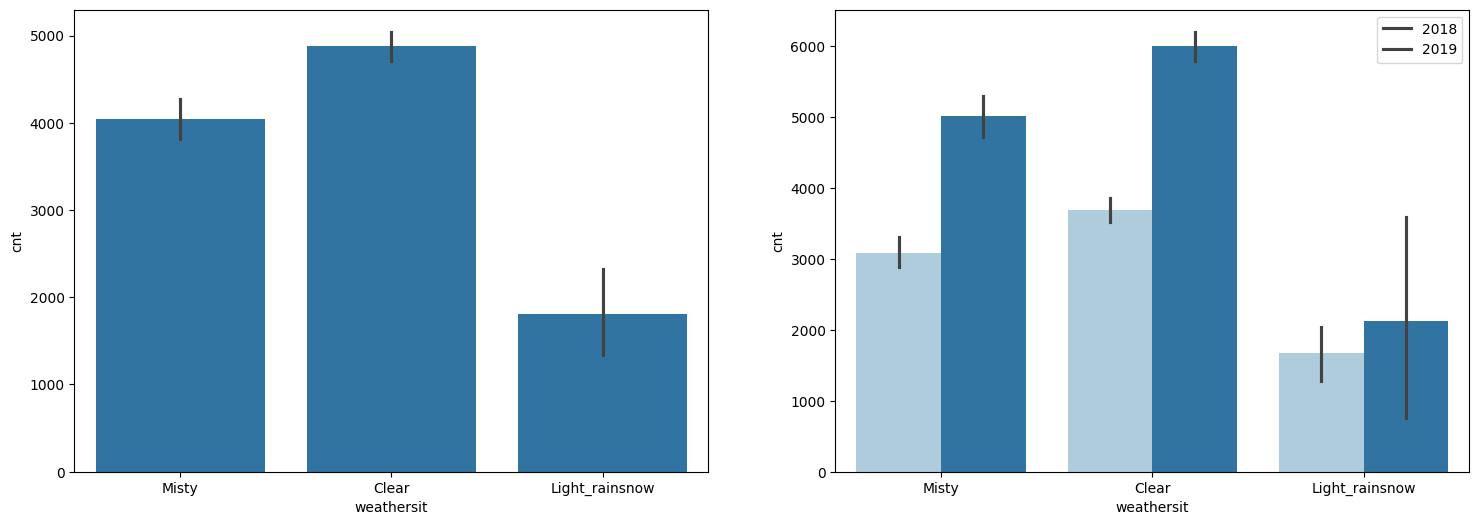

In [ ]:
categorical_plot('weathersit',18,6)

In [ ]:



categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Thursday,487923,4691.57,104,14.83,14.25
Sunday,485235,4665.72,104,14.74,14.25
Saturday,481176,4626.69,104,14.62,14.25
Friday,478132,4597.42,104,14.53,14.25
Wednesday,462276,4444.96,104,14.05,14.25
Tuesday,448822,4274.50,105,13.64,14.38
Monday,447281,4259.82,105,13.59,14.38


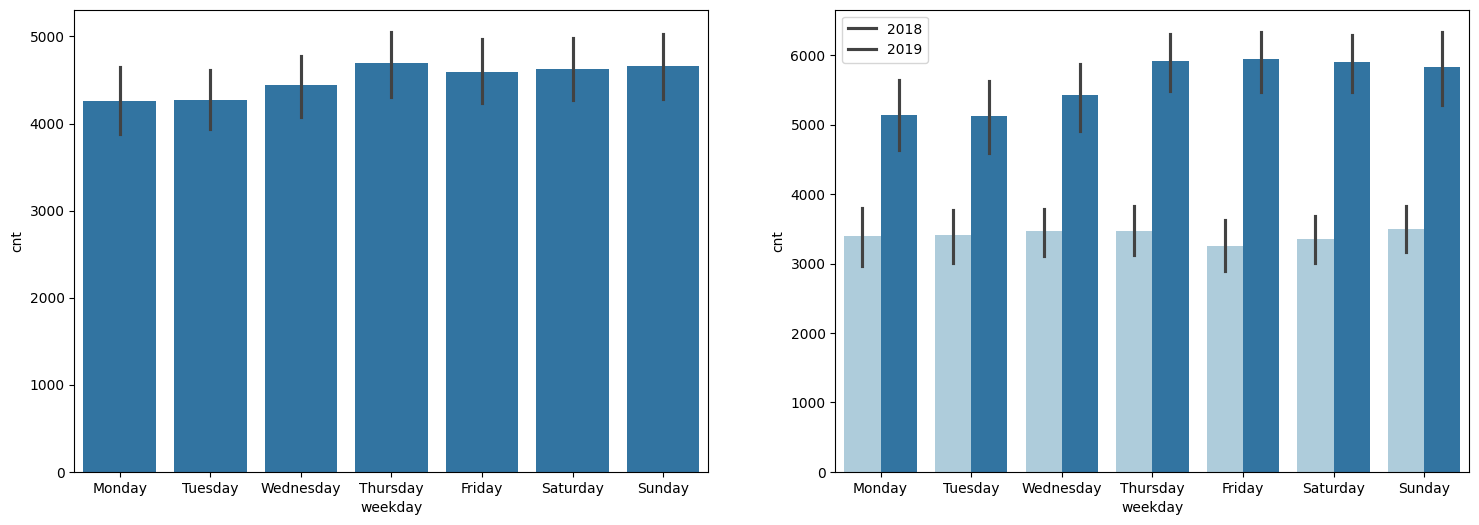

In [ ]:


categorical_plot('weekday',18,6)

In [ ]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


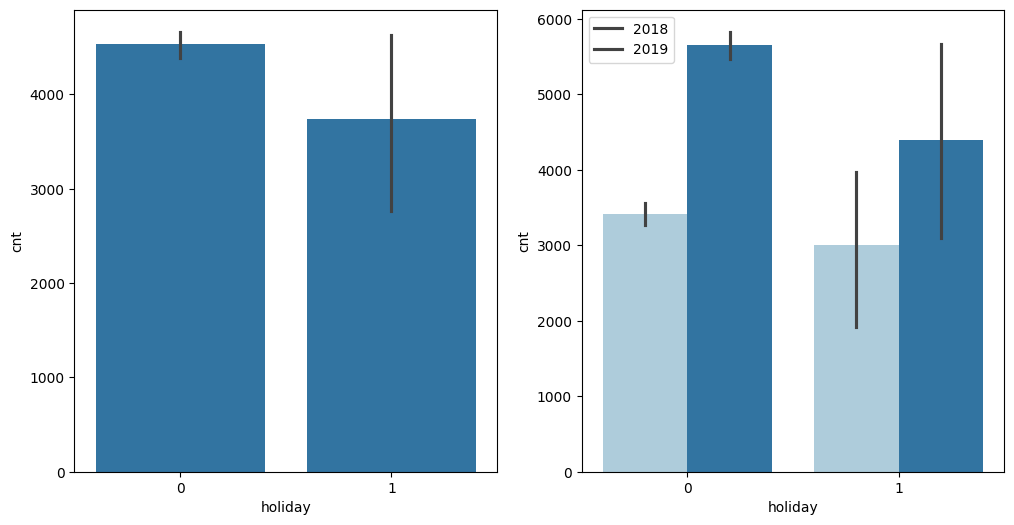

In [ ]:


categorical_plot('holiday',12,6)

In [ ]:

categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


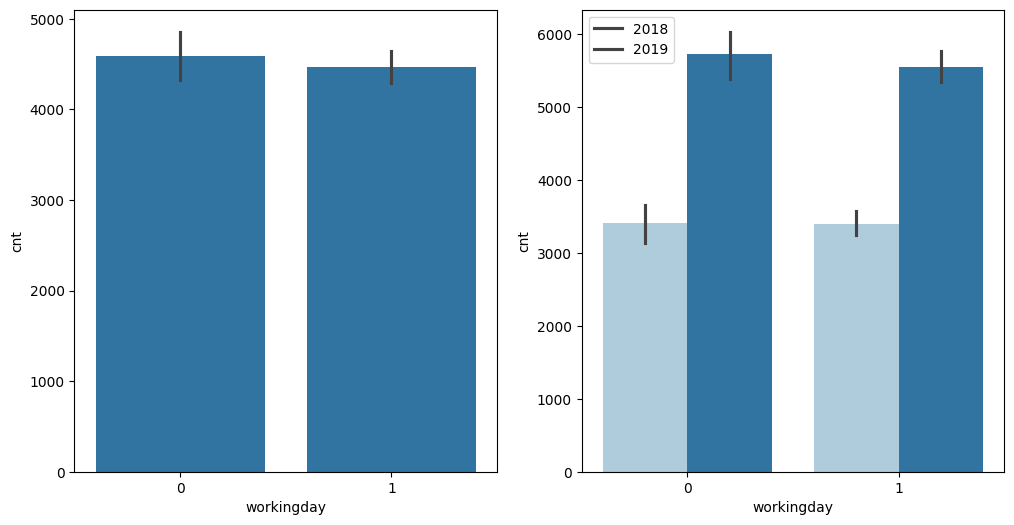

In [ ]:
categorical_plot('workingday',12,6)

In [ ]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


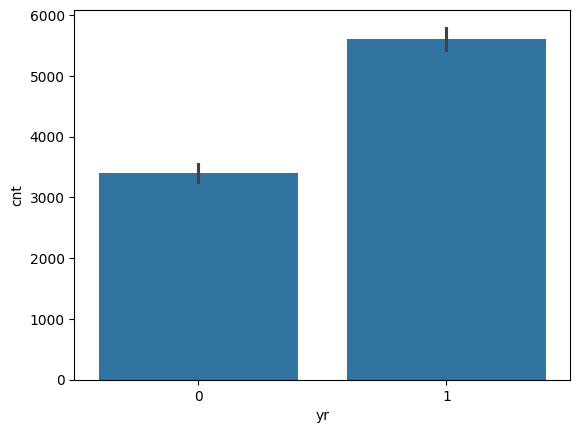

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='yr', y='cnt', data=bike)  # Use x and y to specify columns within the 'bike' DataFrame
plt.show()

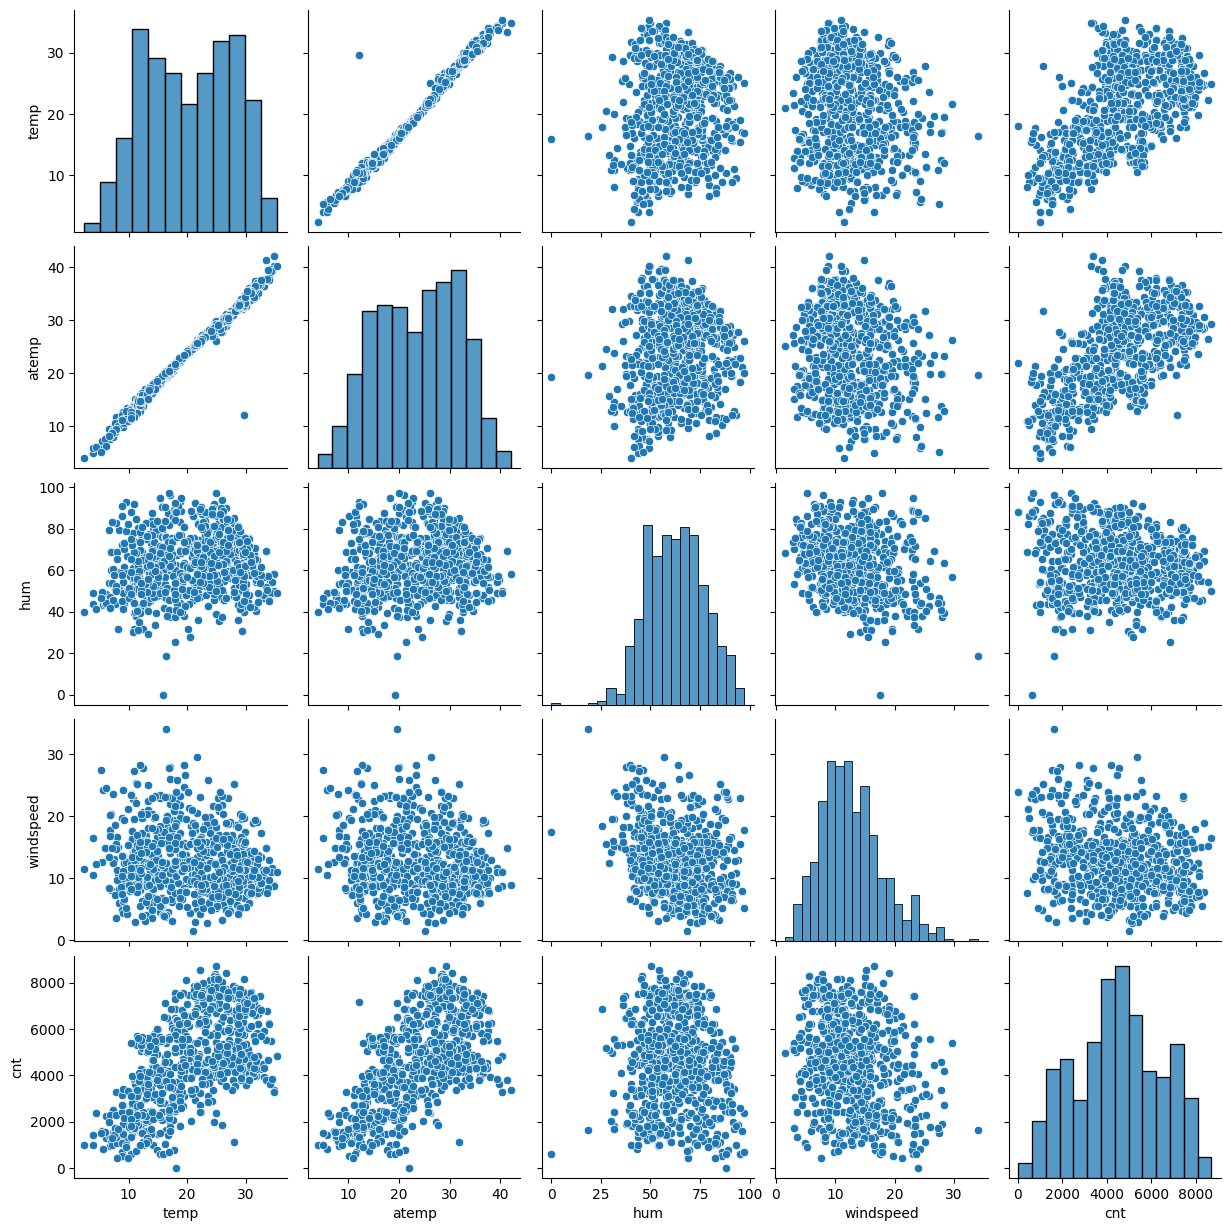

In [ ]:
#Generating pairplot to check the relationships between numeric variables variables
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

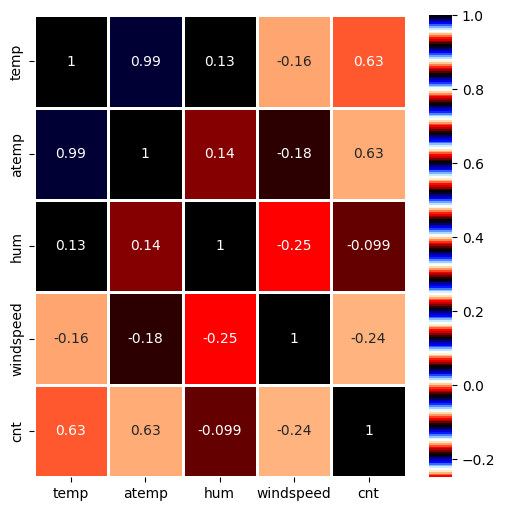

In [ ]:




plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="flag",linewidth =1)

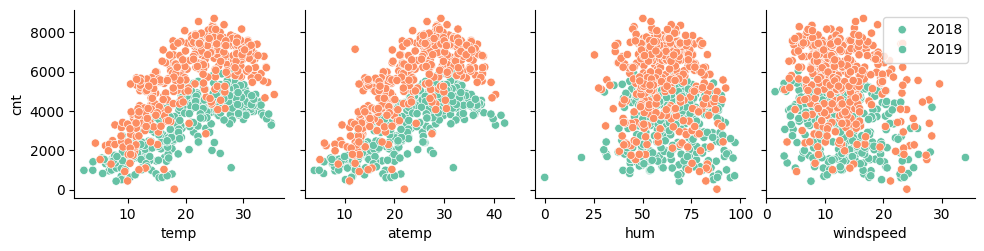

In [ ]:



ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()


<span style='font-family:Georgia'>
    <p> Season </p>
</span>

### **Step 3: Data Preparation**

In [ ]:
season = pd.get_dummies(bike['season'], drop_first = True,dtype=int)
season.head(3)

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0


<span style='font-family:Georgia'>
    <p> Weather </p>
</span>

In [ ]:

weather = pd.get_dummies(bike['weathersit'], drop_first = True,dtype=int)
weather.head(3)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0


<span style='font-family:Georgia'>
    <p> Month </p>
</span>

In [ ]:



month = pd.get_dummies(bike['mnth'], drop_first = True,dtype=int)
month.head(3)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0









<span style='font-family:Georgia'>
    <p> Weekday </p>
</span>

In [ ]:
weekday = pd.get_dummies(bike['weekday'], drop_first = True,dtype=int)
weekday.head(3)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1


In [ ]:
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added
bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,W1_Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,W1_Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,W1_Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
bike_new.shape

(730, 34)

In [ ]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  W2_Summer       730 non-null    int64  
 13  W3_Fall         730 non-null    int64  
 14  W4_Winter       730 non-null    int64  
 15  Aug             730 non-null    int64  
 16  Dec             730 non-null    int64  
 17  Feb             730 non-null    int

In [ ]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

In [ ]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   W2_Summer       730 non-null    int64  
 9   W3_Fall         730 non-null    int64  
 10  W4_Winter       730 non-null    int64  
 11  Aug             730 non-null    int64  
 12  Dec             730 non-null    int64  
 13  Feb             730 non-null    int64  
 14  Jan             730 non-null    int64  
 15  Jul             730 non-null    int64  
 16  Jun             730 non-null    int64  
 17  Mar             730 non-null    int

### **Step 4: Splitting the data into Train & Test Dataset**

In [ ]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

In [ ]:
bike_train.shape

(510, 30)

In [ ]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,20.218078,23.590696,62.340743,12.771365,4494.103922,0.245098,0.262745,...,0.084314,0.082353,0.025490,0.343137,0.141176,0.143137,0.145098,0.139216,0.152941,0.131373
std,0.500487,0.151726,0.462867,7.500110,8.138271,14.418728,5.205888,1948.315655,0.430568,0.440557,...,0.278131,0.275172,0.157763,0.475223,0.348545,0.350557,0.352545,0.346511,0.360284,0.338139
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.958300,15.624869,5962.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
bike_test.shape

(220, 30)

In [ ]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,20.553817,24.040727,63.749086,12.745665,4540.236364,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,7.533926,8.188064,13.790510,5.184271,1911.199159,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight:</b> Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 220 in test dataset
    </span>    
</div>

In [ ]:
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [ ]:
#Dataframe before scaling
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,16.126653,19.5698,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,31.638347,35.1646,55.0833,10.500039,4266,0,1,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,14.862500,18.4969,83.8750,6.749714,3786,0,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [ ]:
#Checking after rescalling
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,1,0,0,0,0,0


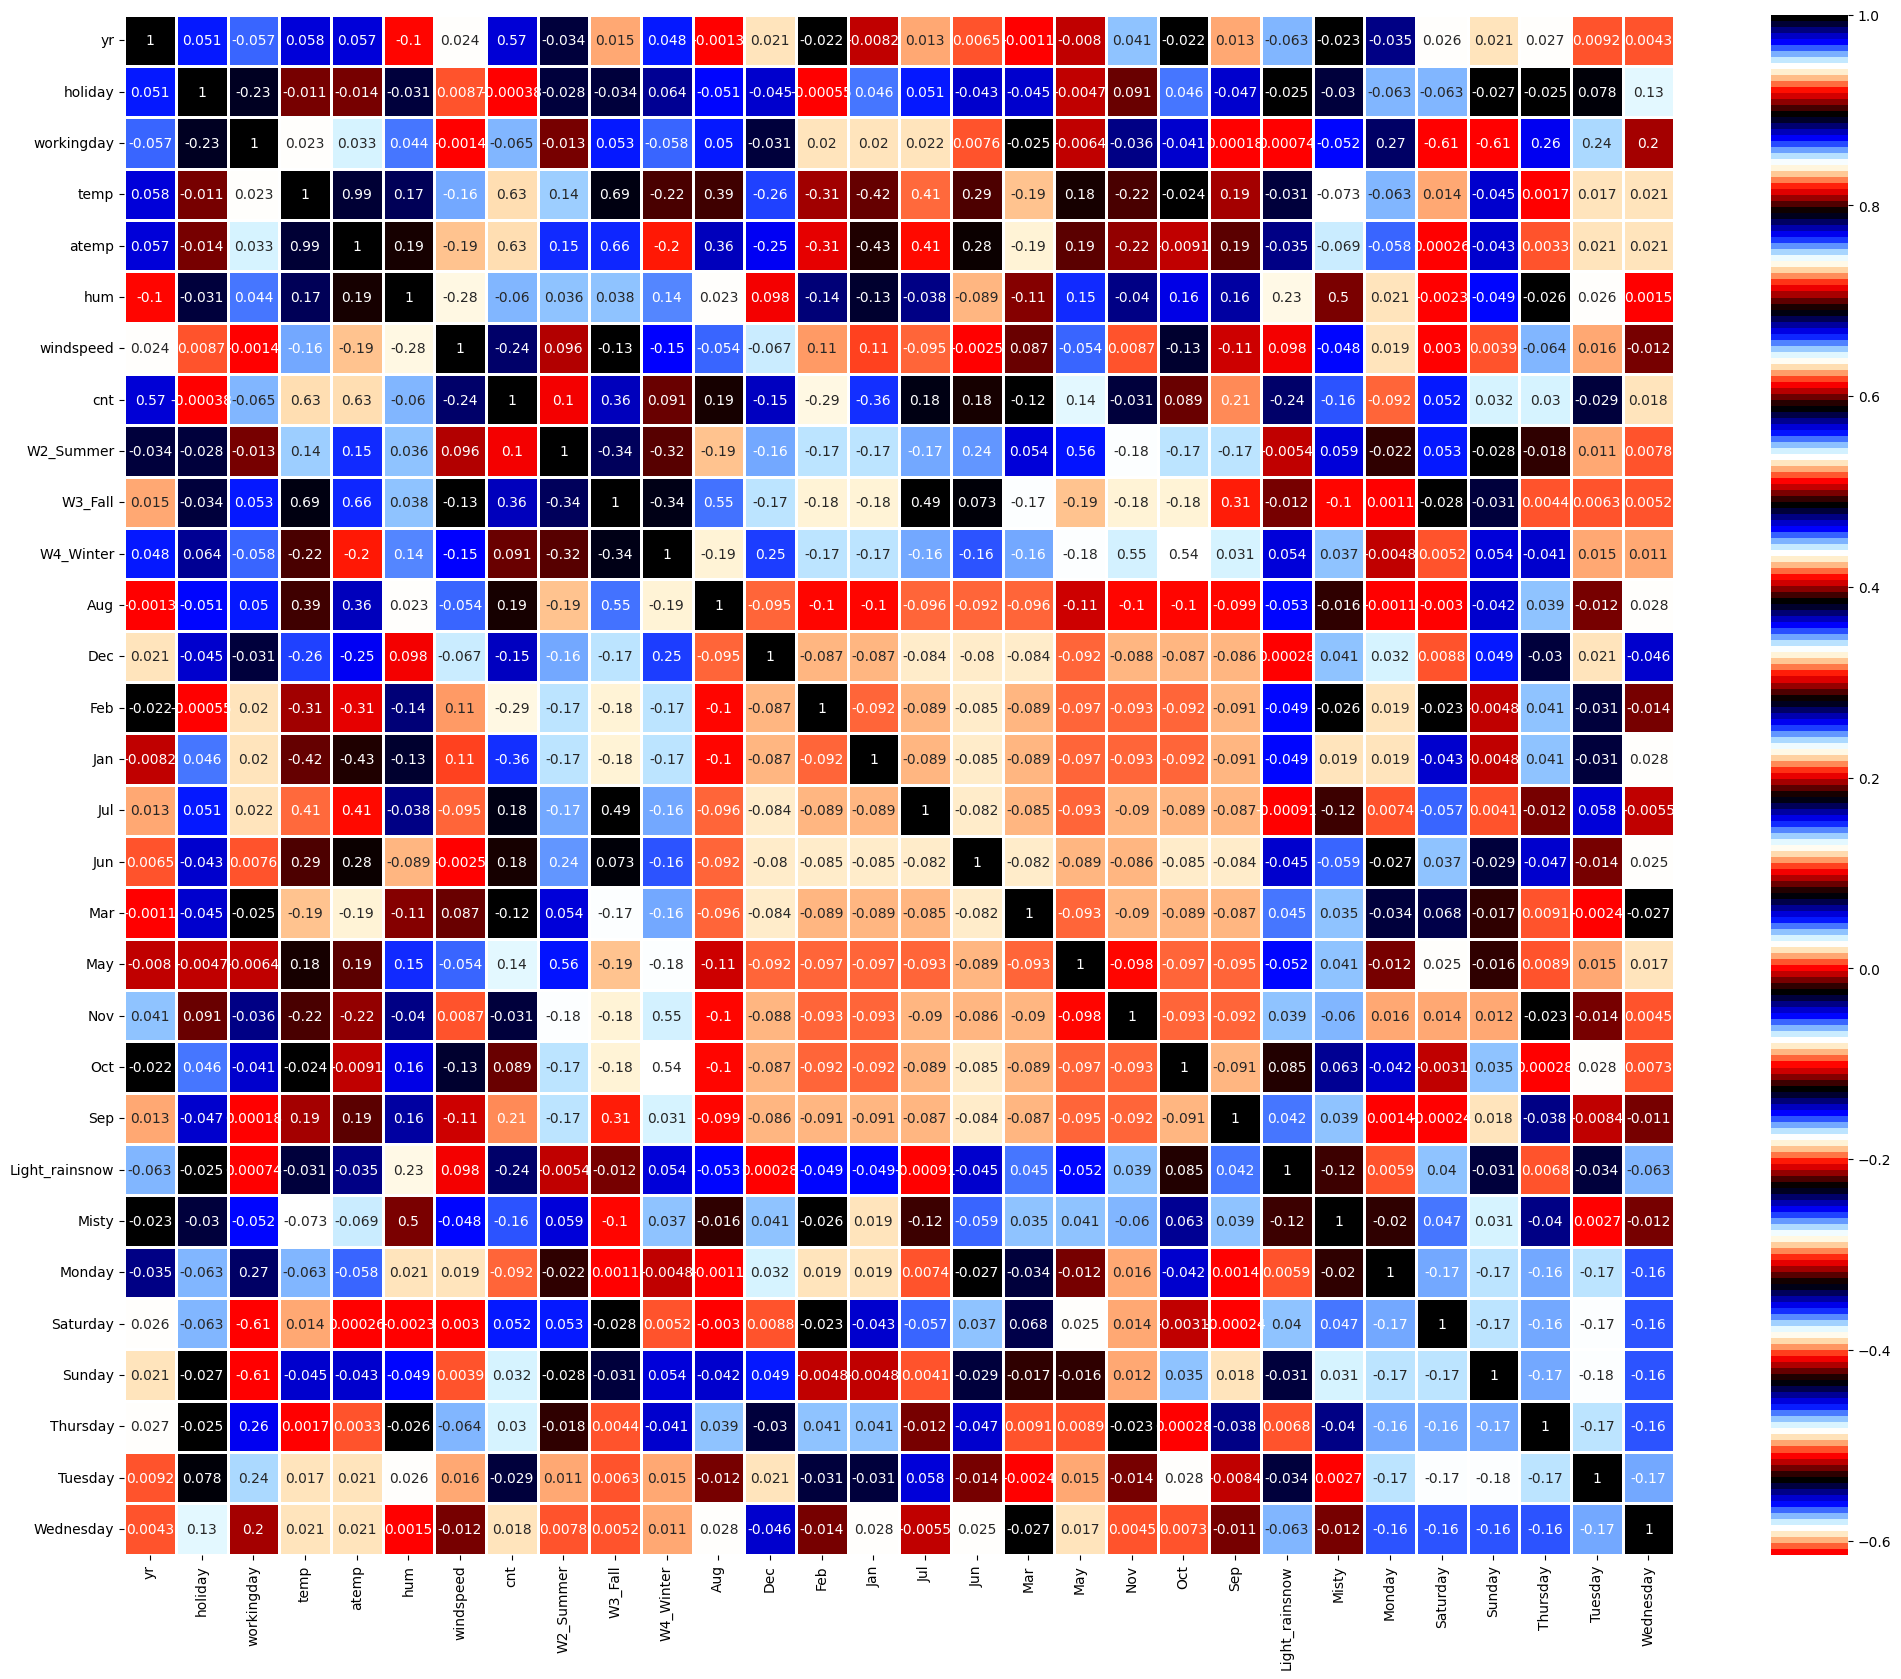

In [ ]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="flag",linewidth =1)
plt.show()

### **Step 5: Building the Linear Model**

In [ ]:

y_train = bike_train.pop('cnt')
X_train = bike_train

In [ ]:


print(type(RFE))


from sklearn.feature_selection import RFE


lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

<class 'abc.ABCMeta'>


In [ ]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 2),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('Jul', False, 5),
 ('Jun', False, 14),
 ('Mar', False, 8),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 10),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 15),
 ('Tuesday', False, 7),
 ('Wednesday', False, 12)]

In [ ]:

col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'W2_Summer',
       'W3_Fall', 'W4_Winter', 'Nov', 'Sep', 'Light_rainsnow', 'Misty',
       'Saturday', 'Sunday'],
      dtype='object')

In [ ]:

X_train.columns[~rfe.support_]

Index(['holiday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Oct', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [ ]:

X_train_rfe = X_train[col]

In [ ]:

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculateVIF(df):
    # Handle potential infinite or NaN values
    df_finite = df.replace([np.inf, -np.inf], np.nan).dropna()  # Drop rows with infinite or NaN values

    vif = pd.DataFrame()
    vif['Features'] = df_finite.columns
    vif['VIF'] = [variance_inflation_factor(df_finite.values, i) for i in range(df_finite.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [ ]:
# Convert relevant columns in X_train_rfe to numeric types if they are not already
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')  # 'coerce' will replace non-numeric values with NaN

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)




In [ ]:
import pandas as pd
import statsmodels.api as sm
X_train_new1 = X_train_rfe.drop(["atemp"], axis = 1)
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new1)

# Check and convert data types if necessary
for col in X_train_lm1.select_dtypes(include=['object']).columns:
    try:
        X_train_lm1[col] = pd.to_numeric(X_train_lm1[col], errors='coerce')
    except:
        print(f"Could not convert column {col} to numeric.")

# Check if y_train is a Pandas Series and convert if necessary
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()  # Convert to a NumPy array

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1.astype(float)).fit() # Ensure all data is float

print(lr1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.2
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          5.73e-183
Time:                        09:05:55   Log-Likelihood:                 498.12
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     495   BIC:                            -902.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1924      0.040      4.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:

# Add a constant
X_train_new2 = X_train_new1.drop(["hum",'W3_Fall','Sunday','windspeed'], axis = 1)
X_train_lm3 = sm.add_constant(X_train_new2)

# Check and convert data types if necessary
for col in X_train_lm3.select_dtypes(include=['object']).columns:
    try:
        X_train_lm3[col] = pd.to_numeric(X_train_lm3[col], errors='coerce')
    except:
        print(f"Could not convert column {col} to numeric.")

# Check if y_train is a Pandas Series and convert if necessary
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()  # Convert to a NumPy array

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3.astype(float)).fit() # Ensure all data is float

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     211.5
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          2.50e-172
Time:                        09:05:55   Log-Likelihood:                 461.85
No. Observations:                 510   AIC:                            -901.7
Df Residuals:                     499   BIC:                            -855.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0680      0.017      4.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train_new is your DataFrame after dropping 'atemp'

# Step 1: Check column names and existence
print(X_train_new2.columns)

# Step 2: Check if the column you intend to check exists
# Replace 'windspeed' with the name of the column you want to verify
if 'temp' not in X_train_new2.columns:  # Changed 'actual_column_name' to 'windspeed'
    raise ValueError("Column 'temp' not found in X_train_new DataFrame.")

# ... (rest of your code)



Index(['yr', 'workingday', 'temp', 'W2_Summer', 'W4_Winter', 'Nov', 'Sep',
       'Light_rainsnow', 'Misty', 'Saturday'],
      dtype='object')


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming X_train_lm4 and y_train are your training dataframes/series

# Step 1: Check data types
print(X_train_new2.dtypes)

# Step 2: Convert non-numeric columns if necessary
# For example, if 'category_column' is categorical and needs encoding:
# X_train_lm4['category_column'] = pd.factorize(X_train_lm4['category_column'])[0]

# Step 3: Ensure no missing values
# X_train_lm4 = X_train_lm4.dropna()

# Step 4: Fit the model
# Now try fitting the model (only if all columns in X_train_lm4 and y_train are numeric)
X_train_new3 = X_train_new2.drop(["Nov"], axis = 1)
lr4 = sm.OLS(y_train.astype(float), X_train_new3.astype(float)).fit()

print(lr4.summary())


yr                  int64
workingday          int64
temp              float64
W2_Summer           int64
W4_Winter           int64
Nov                 int64
Sep                 int64
Light_rainsnow      int64
Misty               int64
Saturday            int64
dtype: object
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1714.
Date:                Fri, 05 Jul 2024   Prob (F-statistic):                        0.00
Time:                        09:05:55   Log-Likelihood:                          453.07
No. Observations:                 510   AIC:                                     -888.1
Df Residuals:                     501   BIC:                                     -850.0
Df Model:             

In [ ]:

print(X_train_new3.columns)

if 'Nov' in X_train_new3.columns:
    X_train_new3 = X_train_new3.drop(['Nov'], axis=1)
else:
    print("Column 'Nov' not found in X_train_new DataFrame.")
X_train_new3 = X_train_new3.dropna()
vif_results = calculateVIF(X_train_new3)
print(vif_results)


Index(['yr', 'workingday', 'temp', 'W2_Summer', 'W4_Winter', 'Sep',
       'Light_rainsnow', 'Misty', 'Saturday'],
      dtype='object')
Column 'Nov' not found in X_train_new DataFrame.
         Features   VIF
2            temp  4.53
1      workingday  3.44
0              yr  1.92
8        Saturday  1.56
3       W2_Summer  1.54
7           Misty  1.49
4       W4_Winter  1.38
5             Sep  1.19
6  Light_rainsnow  1.05


### **Step 6: Model Validation**

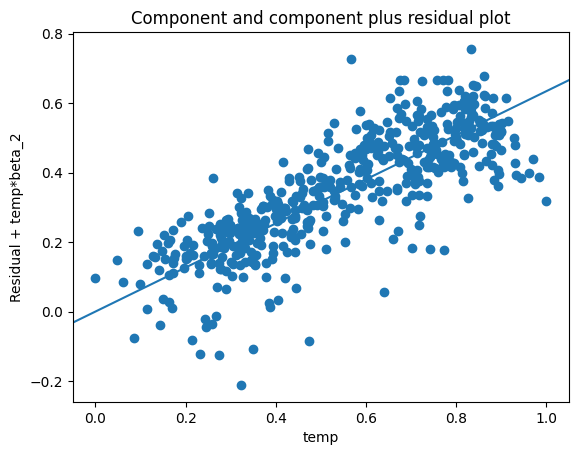

In [ ]:
sm.graphics.plot_ccpr(lr4, 'temp')
plt.show()

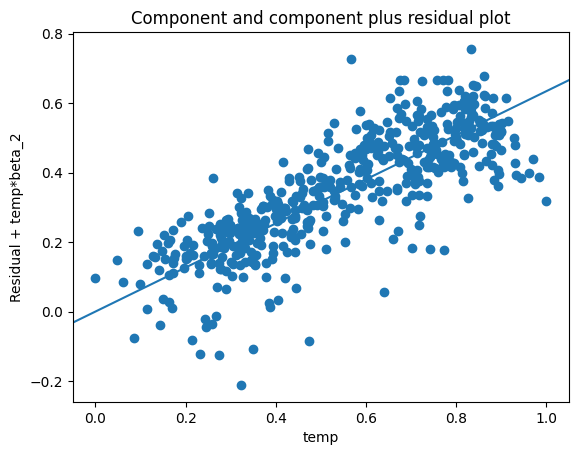

In [ ]:
sm.graphics.plot_ccpr(lr4, 'temp')
plt.show()

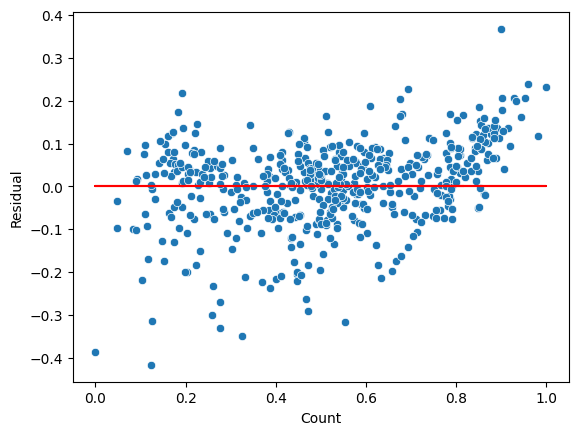

In [ ]:
y_train_pred = lr4.predict(X_train_new3)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

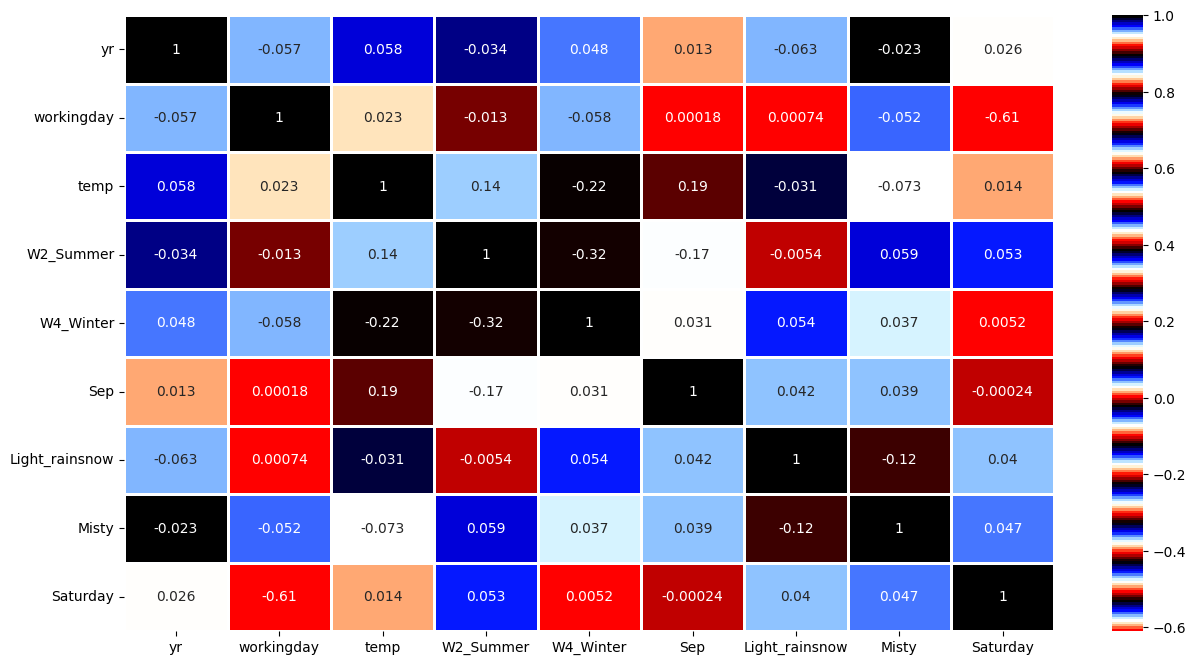

In [ ]:



plt.figure(figsize=(15,8))
sns.heatmap(X_train_new3.corr(),annot = True, cmap="flag",linewidth =1)
plt.show()

In [ ]:

calculateVIF(X_train_new3)

,Features,VIF
2,temp,4.53
1,workingday,3.44
0,yr,1.92
8,Saturday,1.56
3,W2_Summer,1.54
7,Misty,1.49
4,W4_Winter,1.38
5,Sep,1.19
6,Light_rainsnow,1.05


In [ ]:
print('The Durbin-Watson value for Final Model lr 4 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 4 is 2.0501


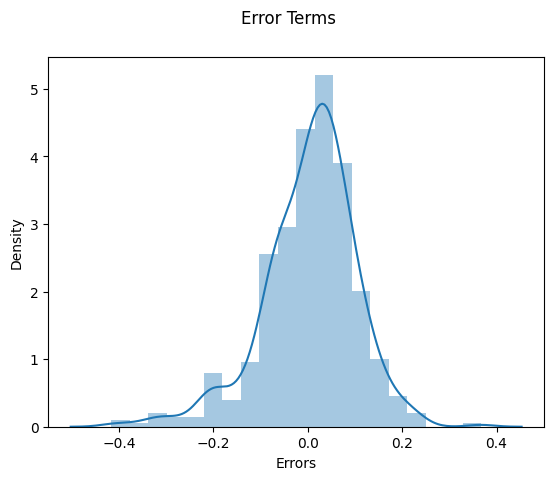

In [ ]:
res = y_train-y_train_pred

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')
plt.show()

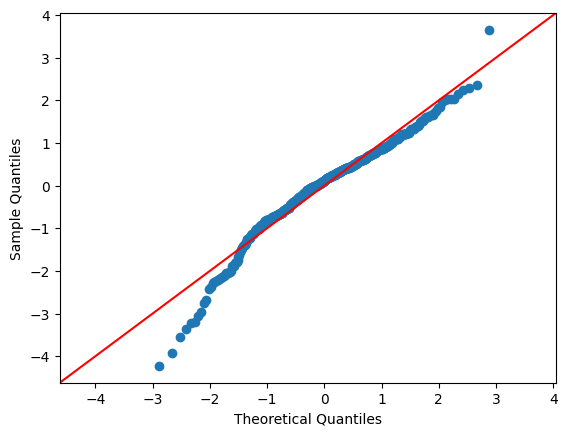

In [ ]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### **Step 7: Making Predictions using final model**

In [ ]:

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,1,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,1,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,1,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,1,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:

bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,0.550981,0.527344,0.662328,0.346015,0.519816,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,0.228967,0.214959,0.143278,0.159517,0.219880,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [ ]:

col1=X_train_new3.columns

X_test_new=X_test[col1]

X_test_new.head()

,yr,workingday,temp,W2_Summer,W4_Winter,Sep,Light_rainsnow,Misty,Saturday
22,0,1,0.046591,0,0,0,0,0,0
468,1,0,0.543115,1,0,0,0,0,0
553,1,1,0.951196,0,0,0,0,0,0
504,1,1,0.699909,1,0,0,0,0,0
353,0,1,0.407087,0,1,0,0,1,0


In [ ]:


y_pred = lr4.predict(X_test_new)

### **Step 8: Model Evaluation**

Text(0, 0.5, 'y_pred')

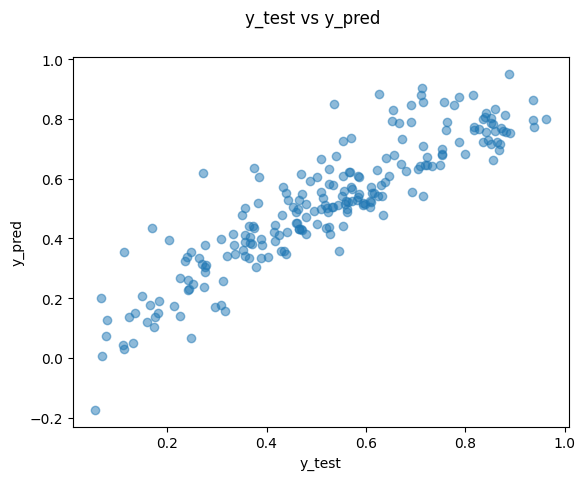

In [ ]:

fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8026

In [ ]:

n = X_test.shape[0]

p = X_test.shape[1]

adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7725

In [ ]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0975

In [ ]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0763